# Q2)
Calculate the correlation matrices for the time series data extracted for EO and EC conditions. Visualize the corresponding graphs on top of the brain glass schematics. Discuss the visual differences between the graphs from two conditions.

Hint: check plot connectome function in nilearn for more details.

https://nilearn.github.io/stable/modules/generated/nilearn.plotting.plot_connectome.html

In [1]:
# Import the requred Packages
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nibabel as nib

fmri_file = '../../datasets/fMRI/HW4/sub-001_ses-001_task-eoec_bold.nii.gz' # Get the nifti file
img = nib.load(fmri_file) # Load in the nifti file
print(type(img)) # Print the type of the img variable (should be nifti)
print(img.shape) # Print the dimensions of the object

<class 'nibabel.nifti1.Nifti1Image'>
(64, 64, 35, 120)


## Import Masker & Atlas
To get the ROI time series data from the whole fMRI dataset.

In [3]:
# Load the required Packages
import nilearn as nl
import numpy as np
# Retrieve the atlas and the data
from nilearn import datasets
# Fetch the atlas file.
atlas = datasets.fetch_atlas_msdl()
# Loading the the Probabilistic atlas image
atlas_filename = atlas['maps']
# Loading the list containing the labels of the regions
labels = atlas['labels']
# Extract time series
data = img.get_fdata() # Get the 4 dimentional data from the fMRI
# import maskers
from nilearn.maskers import NiftiMapsMasker
masker = NiftiMapsMasker(maps_img=atlas_filename, standardize=True, memory='nilearn_cache', verbose=5) # get masker from atlas
time_series = masker.fit_transform(img) # get time series from fMRI fitted with the given masker

[NiftiMapsMasker.wrapped] loading regions from None
Resampling maps
[Memory]0.0s, 0.0min    : Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min


/home/joshua/.local/lib/python3.10/site-packages/nilearn/maskers/base_masker.py:253: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  return self.transform_single_imgs(


[Memory]0.3s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min


## Split EO (Eyes Open) & EC (Eyes Closed) data 
into 2 different time series arrays at all ROIs.

In [11]:
# Timing table (onset, duration, trial_type) fitted to the timed intervals (120)
timing_info = [
    (0, 10, "EC"), (10, 10, "EO"), (20, 10, "EC"), (30, 10, "EO"),
    (40, 10, "EC"), (50, 10, "EO"), (60, 10, "EC"), (70, 10, "EO"),
    (80, 10, "EC"), (90, 10, "EO"), (100, 10, "EC"), (110, 10, "EO")
]

# Initialize masks
ec_mask = np.zeros(120, dtype=bool)  # For EC condition
eo_mask = np.zeros(120, dtype=bool)  # For EO condition

# Create masking indecies for EC and EO
for onset, duration, trial_type in timing_info:
    if trial_type == "EC":
        ec_mask[onset:onset + duration] = True
    elif trial_type == "EO":
        eo_mask[onset:onset + duration] = True

# Apply masks to the 4D fMRI data
ec_data = data[..., ec_mask]  # EC condition data
eo_data = data[..., eo_mask]  # EO condition data

# Get random ROI (region of interest)
roi_time_series = time_series[:]  # Full time series for the all ROI
roi_ec_time_series = roi_time_series[ec_mask]  # Time series for EC condition
roi_eo_time_series = roi_time_series[eo_mask]  # Time series for EO condition


## Plot EO (eyes open) Corralation Matrix

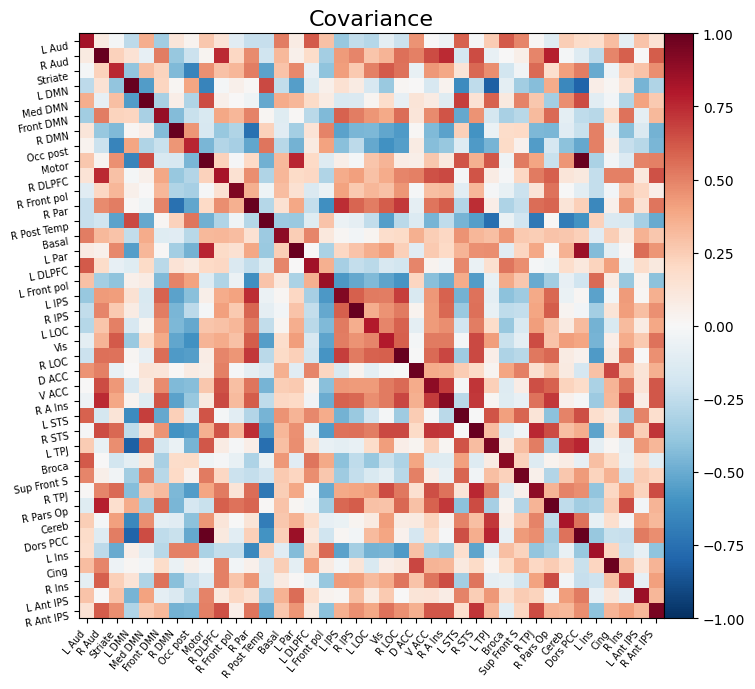

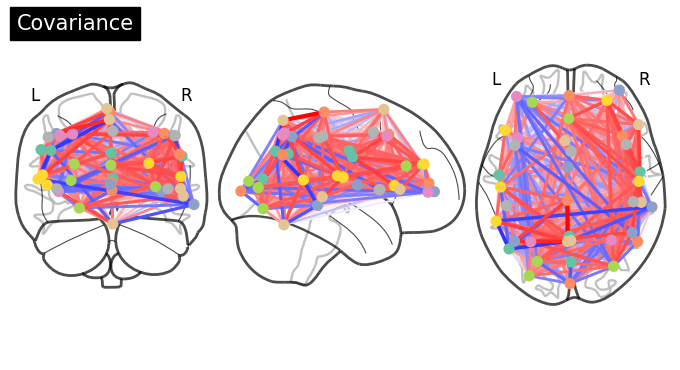

In [13]:
# from nilearn import plotting
from nilearn.connectome import ConnectivityMeasure

# Display the connectome matrix
from nilearn import plotting

connectivity_measure = ConnectivityMeasure(kind='covariance') # create the covariance object
estimator = connectivity_measure.fit([roi_eo_time_series]) # get the estimator from the covariance object
covariance_matrix = connectivity_measure.fit_transform([roi_eo_time_series])[0]  # extract the single subject's covariance matrix

# Display the covariance
plotting.plot_matrix(covariance_matrix, labels=labels, figure=(9,7), vmax=1, vmin=-1, title='Covariance')

coords = atlas.region_coords # get coords in all ROIs from atlas

# Display the corresponding brain connectivity
plotting.plot_connectome(covariance_matrix, coords,title='Covariance')

## EO Covariance Plot Analysis
It seems that there are more positive corralations than negative corralations on average, with the strongest connections being located in the back of the brain in the upper portion (occipital lobe) for both positive and negative corralations. And the weakest corralations being located in the front of the brain in the upper portion (frontal lobe).

## Plot EC (eyes closed) Corralation Matrix

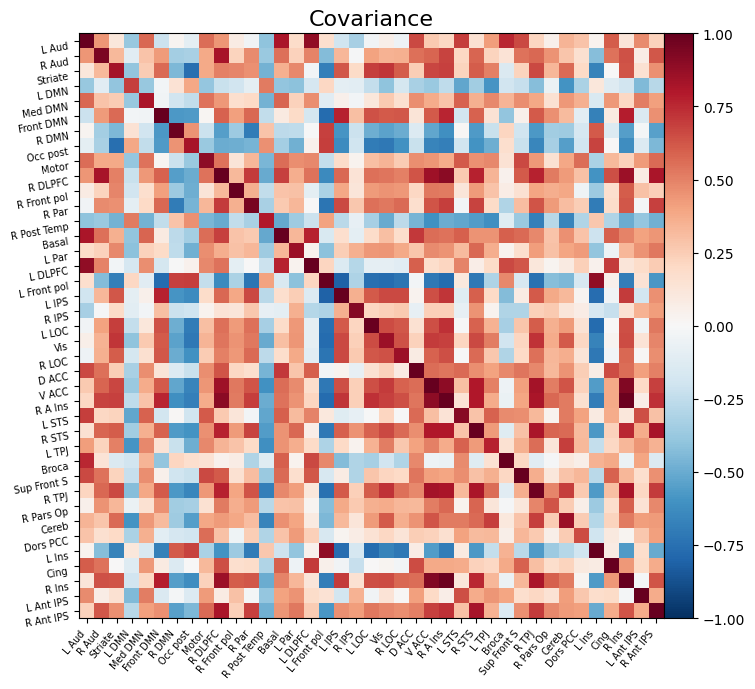

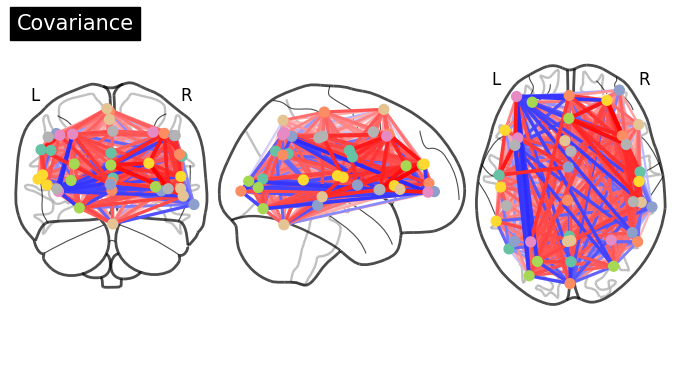

In [15]:
# from nilearn import plotting
from nilearn.connectome import ConnectivityMeasure

# Display the connectome matrix
from nilearn import plotting

connectivity_measure = ConnectivityMeasure(kind='covariance') # create the covariance object
estimator = connectivity_measure.fit([roi_ec_time_series]) # get the estimator from the covariance object
covariance_matrix = connectivity_measure.fit_transform([roi_ec_time_series])[0]  # extract the single subject's covariance matrix

# Display the covariance
plotting.plot_matrix(covariance_matrix, labels=labels, figure=(9,7), vmax=1, vmin=-1, title='Covariance')

coords = atlas.region_coords # get coords in all ROIs from atlas

# Display the corresponding brain connectivity
plotting.plot_connectome(covariance_matrix, coords,title='Covariance')

## EC Covariance Plot Analysis
It seems that there are more positive corralations than negative corralations on average, with the strongest connections being located in the front of the brain in the upper portion (frontal lobe). And the weakest corralations being located in the back of the brain in the upper portion (occipital lobe). However there was a lot of negative corralation stemming from the frontal lobe upper left portion of the brain in the top down image. There was a lot of positive corralation stemming from the frontal lobe upper right porition of the brain in the top down image too, but it doesn't seem as obvious like the left portion's negative corralation.


---

## EO and EC Comparison Analysis
The EC had way stronger corralations on average in comparision to EO. However EO still did have a lot of the same colors that EC, just less drastic (weaker corralation, but still in the same direction for the most part). From this we can tell that when the eyes are open there is more emphasis on the occipital lobe incomparasion to the other parts of the brain just due to the stronger connections in that region along with the weaker connection to the other parts of the brain. While in eyes closed we can assume there is more interconnectivity with all parts of the brain because of the higher corralation values going on in all areas of the brain verses what we saw before.